In [8]:
import pandas as pd
import numpy as np

PATH = '/home/kai/data/kaggle/homecredit/'
train = pd.read_csv(PATH + 'application_train.csv')
print('train')
test = pd.read_csv(PATH + 'application_test.csv')
print('test')
bureau = pd.read_csv(PATH + 'bureau.csv')
print('bureau')
bb = pd.read_csv(PATH + 'bureau_balance.csv')
print('bureau_balance')
df = pd.concat([train[['SK_ID_CURR']], test[['SK_ID_CURR']]])
print('concat')

train
test
bureau
bureau_balance
concat


In [ ]:
bbid = set(bb.SK_ID_BUREAU)
bid = set(bureau.SK_ID_BUREAU)
bcid = set(bureau.SK_ID_CURR)
trid = set(train.SK_ID_CURR)
teid = set(test.SK_ID_CURR)
diid = set(bbid & bid)
dicid = set([bureau.loc[i, 'SK_ID_CURR'] for i in range(bureau.shape[0]) if bureau.loc[i, 'SK_ID_BUREAU'] in diid])

In [ ]:
print('te-bcid', len(teid&bcid)/len(teid),len(teid&bcid),len(teid))
print('te-bcid', len(trid&bcid)/len(trid),len(trid&bcid),len(trid))

In [ ]:
print('te-bb', len(dicid&teid)/len(teid),len(dicid&teid),len(teid))
print('tr-bb', len(dicid&trid)/len(trid),len(dicid&trid),len(trid))

In [ ]:
print(len(ditrid))

In [2]:
import pandas as pd
PATH = '/home/kai/data/kaggle/homecredit/'

x = pd.read_csv(PATH + 'submission_merged0.csv')

In [4]:
y = x.groupby('SK_ID_CURR').mean().reset_index()

In [5]:
print(y)

       SK_ID_CURR    TARGET
0          100001  0.024176
1          100005  0.131540
2          100013  0.006864
3          100028  0.038154
4          100038  0.133730
5          100042  0.013979
6          100057  0.003022
7          100065  0.024512
8          100066  0.005154
9          100067  0.054297
10         100074  0.057534
11         100090  0.022338
12         100091  0.107015
13         100092  0.027780
14         100106  0.029416
15         100107  0.173929
16         100109  0.043275
17         100117  0.016109
18         100128  0.048772
19         100141  0.029929
20         100150  0.014425
21         100168  0.003050
22         100169  0.019907
23         100170  0.213396
24         100171  0.057386
25         100172  0.162565
26         100184  0.042113
27         100187  0.046182
28         100212  0.015061
29         100222  0.049663
...           ...       ...
48714      455963  0.014638
48715      455965  0.001692
48716      456007  0.180286
48717      456008  0

In [11]:
test.SK_ID_CURR

0        100001
1        100005
2        100013
3        100028
4        100038
5        100042
6        100057
7        100065
8        100066
9        100067
10       100074
11       100090
12       100091
13       100092
14       100106
15       100107
16       100109
17       100117
18       100128
19       100141
20       100150
21       100168
22       100169
23       100170
24       100171
25       100172
26       100184
27       100187
28       100212
29       100222
          ...  
48714    455963
48715    455965
48716    456007
48717    456008
48718    456009
48719    456010
48720    456011
48721    456013
48722    456028
48723    456058
48724    456111
48725    456114
48726    456115
48727    456116
48728    456119
48729    456120
48730    456122
48731    456123
48732    456166
48733    456167
48734    456168
48735    456169
48736    456170
48737    456189
48738    456202
48739    456221
48740    456222
48741    456223
48742    456224
48743    456250
Name: SK_ID_CURR, Length

In [6]:
print((y['TARGET']>0.5).sum())

200


In [7]:
y.to_csv(PATH + 'submission_wrong.csv', index=False)

In [1]:
import pandas as pd

PATH = '/home/kai/data/kaggle/homecredit/'
x = pd.read_csv(PATH + 'previous_application.csv')
y = pd.read_csv(PATH + 'installments_payments.csv')

In [2]:
set(x['NAME_CONTRACT_STATUS'])

{'Approved', 'Canceled', 'Refused', 'Unused offer'}

In [7]:
z = x[x['NAME_CONTRACT_STATUS']=='Refused']
z.SK_ID_PREV

4          1784265
19         1173070
20         1506815
22         1172842
23         1172937
29         1583704
36         2766278
45         2621158
52         1912041
54         1399859
80         2012211
81         1299881
84         2796269
85         1981960
100        2289239
101        1196771
103        1247611
105        1067163
109        1729112
110        1192792
114        1168659
116        2640293
117        1070086
118        2545472
125        2449093
137        2255346
145        1375746
153        1892110
158        2285261
163        1979918
            ...   
1670114    1483359
1670115    1252861
1670116    1203903
1670117    1228257
1670119    2380375
1670120    2494083
1670121    1637907
1670123    2594678
1670124    1378950
1670126    2698547
1670133    2786851
1670134    2046829
1670136    2625018
1670138    2740155
1670141    1814440
1670142    1483533
1670144    1867344
1670154    1615585
1670157    2623976
1670161    2461432
1670181    2710915
1670184    1

In [12]:
l = []
for i in z.SK_ID_PREV:
    l.append(y[y.SK_ID_PREV == i].shape[0])
    print(l[-1])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


KeyboardInterrupt: 

In [11]:
y[y.SK_ID_PREV == 1662353]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT


In [1]:
import pandas as pd
credit = pd.read_csv('/home/kai/data/kaggle/homecredit/credit_card_balance.csv')

In [2]:
credit.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [3]:
credit[['AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL']]

,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL
0,56.970,135000
1,63975.555,45000
2,31815.225,450000
3,236572.110,225000
4,453919.455,450000
5,82903.815,270000
6,353451.645,585000
7,47962.125,45000
8,291543.075,292500
9,201261.195,225000


In [11]:
sum(credit[['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT']].sum(axis=1) - credit['AMT_DRAWINGS_CURRENT'] > 0)

2565

In [22]:
credit[['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_BALANCE', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE']].isnull().any()

AMT_DRAWINGS_ATM_CURRENT       True
AMT_DRAWINGS_OTHER_CURRENT     True
AMT_DRAWINGS_POS_CURRENT       True
AMT_DRAWINGS_CURRENT          False
AMT_BALANCE                   False
AMT_RECIVABLE                 False
AMT_TOTAL_RECEIVABLE          False
dtype: bool

In [18]:
sum(credit['AMT_PAYMENT_TOTAL_CURRENT'] - credit['AMT_BALANCE'] >= 0)

2273560

In [23]:
import pandas as pd

credit = pd.read_csv('/home/kai/data/kaggle/homecredit/credit_card_balance.csv')
credit['SK_ID_CURR'].unique()

array([378907, 363914, 371185, ..., 174455, 315041, 382749])

In [1]:
import pandas as pd

inst = pd.read_csv('/home/kai/data/kaggle/homecredit/installments_payments.csv')

NameError: name 'minus_name' is not defined

In [2]:
def minus_name(col1, col2): return col1 + '_minus_' + col2
def minus(df, col1, col2): return df[col1] - df[col2]

name1 = minus_name('DAYS_ENTRY_PAYMENT', 'DAYS_INSTALMENT')
inst[name1] = minus(inst, 'DAYS_ENTRY_PAYMENT', 'DAYS_INSTALMENT')
inst.at[inst[name1] < 0, name1] = 0
name2 = minus_name('AMT_INSTALMENT', 'AMT_PAYMENT')
inst[name2] = minus(inst, 'AMT_INSTALMENT', 'AMT_PAYMENT')
inst.at[inst[name2] < 0, name2] = 0

In [4]:
inst[name1].max()
inst[name2].max()

2424726.4050000003

[]

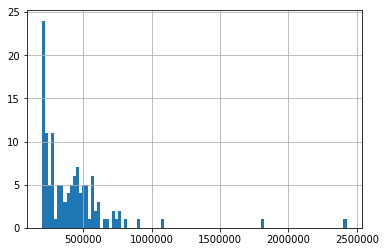

In [15]:
import matplotlib.pyplot as plt
tmp = inst[name2] > 200000

inst[tmp][name2].hist(bins=100)
plt.plot()

[]

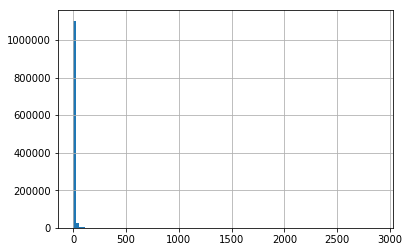

In [17]:
import matplotlib.pyplot as plt
tmp = inst[name1] != 0

inst[tmp][name1].hist(bins=100)
plt.plot()

In [20]:
inst[inst[name1] != 0].sort_values(name1, ascending=False)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DAYS_ENTRY_PAYMENT_minus_DAYS_INSTALMENT,AMT_INSTALMENT_minus_AMT_PAYMENT
8513003,1985467,316087,1.0,10,-2888.0,-4.0,8115.885,15.885,2884.0,8100.000
3198384,1088177,164168,1.0,6,-2891.0,-9.0,6749.190,11.160,2882.0,6738.030
5353635,2495473,210216,1.0,6,-2882.0,-11.0,10266.660,16.875,2871.0,10249.785
2318828,1564008,151276,0.0,17,-2911.0,-59.0,109.035,49.815,2852.0,59.220
1564161,2247294,168241,1.0,6,-2856.0,-4.0,10074.285,16.695,2852.0,10057.590
3662270,2433053,156137,1.0,10,-2853.0,-6.0,6105.285,177.525,2847.0,5927.760
6123374,1405072,230218,1.0,6,-2914.0,-101.0,7292.115,11.835,2813.0,7280.280
1988133,1081512,184984,0.0,1,-2875.0,-85.0,3348.720,5.220,2790.0,3343.500
12474443,1003276,423050,0.0,14,-2905.0,-115.0,24.525,9.000,2790.0,15.525
7370339,1732744,225340,1.0,8,-2905.0,-125.0,7254.720,18.540,2780.0,7236.180


In [71]:
cols = [x for x in inst.columns if x not in ['SK_ID_CURR']]

inst[cols][inst['SK_ID_PREV'] == 1659443].sort_values('DAYS_INSTALMENT', ascending=False)

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DAYS_ENTRY_PAYMENT_minus_DAYS_INSTALMENT,AMT_INSTALMENT_minus_AMT_PAYMENT
13588361,1659443,0.0,104,-1827.0,NaN,67.500,NaN,NaN,NaN
13585713,1659443,0.0,103,-1858.0,NaN,67.500,NaN,NaN,NaN
13605394,1659443,0.0,102,-1888.0,NaN,67.500,NaN,NaN,NaN
13605374,1659443,0.0,101,-1919.0,NaN,67.500,NaN,NaN,NaN
13449500,1659443,0.0,100,-1947.0,-1943.0,67.500,67.500,4.0,0.000
12931768,1659443,0.0,99,-1978.0,-2008.0,138.690,98.865,0.0,39.825
12707173,1659443,0.0,99,-1978.0,-1943.0,138.690,39.825,35.0,98.865
12866174,1659443,0.0,97,-2009.0,-2013.0,3951.135,3951.135,0.0,0.000
11684293,1659443,0.0,98,-2013.0,-2013.0,98.865,98.865,0.0,0.000
13537979,1659443,0.0,95,-2039.0,-2044.0,6750.000,6750.000,0.0,0.000


In [41]:
group = inst.groupby(['SK_ID_PREV', 'NUM_INSTALMENT_NUMBER'])[['AMT_PAYMENT']].sum().reset_index()
group0 = inst.groupby(['SK_ID_PREV', 'NUM_INSTALMENT_NUMBER'])[['AMT_INSTALMENT']].min().reset_index()



12627860

In [45]:
((group['AMT_PAYMENT'] - group0['AMT_INSTALMENT'])<0).sum()

75430

In [49]:
 75430/ 13605401

0.005544121779284565

In [60]:
group = inst.groupby(['SK_ID_PREV', 'NUM_INSTALMENT_NUMBER'])[['NUM_INSTALMENT_VERSION']].nunique().reset_index()
group

,SK_ID_PREV,NUM_INSTALMENT_NUMBER,NUM_INSTALMENT_VERSION
0,1000001,1,1
1,1000001,2,1
2,1000002,1,1
3,1000002,2,1
4,1000002,3,1
5,1000002,4,1
6,1000003,1,1
7,1000003,2,1
8,1000003,3,1
9,1000004,1,1


In [61]:
set(group['NUM_INSTALMENT_VERSION'])

{1, 2, 3}

In [56]:
import pandas
x = pandas.read_csv('/home/kai/data/kaggle/homecredit/application_train.csv')
print(sum(x['TARGET'] == 0)/x.shape[0])

0.9192711805431351


In [57]:
x.shape

(307511, 122)

In [58]:
sum(x['TARGET'])

24825

In [59]:
24825/307511*48000

3874.983333929518

In [67]:
inst.isnull().any()

SK_ID_PREV                                  False
SK_ID_CURR                                  False
NUM_INSTALMENT_VERSION                      False
NUM_INSTALMENT_NUMBER                       False
DAYS_INSTALMENT                             False
DAYS_ENTRY_PAYMENT                           True
AMT_INSTALMENT                              False
AMT_PAYMENT                                  True
DAYS_ENTRY_PAYMENT_minus_DAYS_INSTALMENT     True
AMT_INSTALMENT_minus_AMT_PAYMENT             True
dtype: bool

In [1]:
# group = inst[inst['DAYS_ENTRY_PAYMENT'].isnull()].groupby(['SK_ID_PREV'])
l = []
for i, x in group:
#     l.append(i)

SyntaxError: unexpected EOF while parsing (<ipython-input-1-1494faf726d2>, line 4)

In [2]:
import pandas
x = pandas.read_csv('/home/kai/data/kaggle/homecredit/POS_CASH_balance.csv')

sum(x['SK_DPD'].isnull()) / x.shape[0]

0.0

In [3]:
sum(x['SK_DPD_DEF'].isnull()) / x.shape[0]

0.0

In [4]:
x.isnull().any()

SK_ID_PREV               False
SK_ID_CURR               False
MONTHS_BALANCE           False
CNT_INSTALMENT            True
CNT_INSTALMENT_FUTURE     True
NAME_CONTRACT_STATUS     False
SK_DPD                   False
SK_DPD_DEF               False
dtype: bool

In [5]:
sum(x['SK_DPD_DEF'] == 0) / x.shape[0]

0.988604647488871